#### Aulas 19, 20 e 21 - Projeto de Predição

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
dados = pd.read_csv('california_housing_train.csv')
dados.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [156]:
dados.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


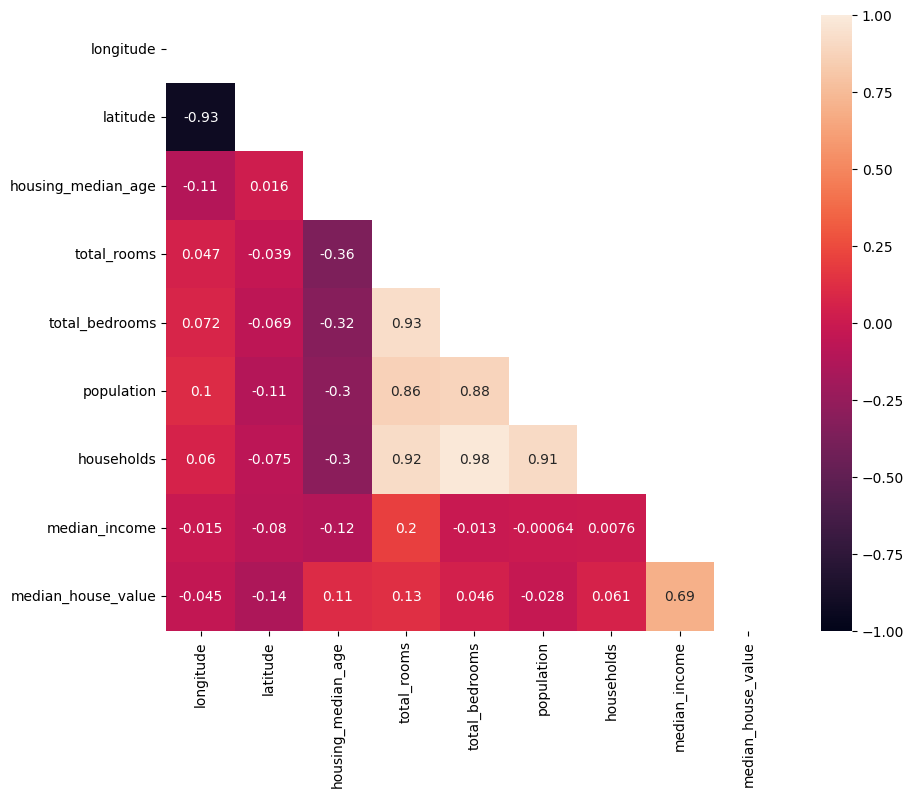

In [157]:
mask = np.triu(np.ones_like(dados.corr(), dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(dados.corr(), mask=mask, square=True, annot=True, vmin=-1, vmax=1)
plt.show()

In [158]:
y = dados['median_house_value'] # alvo
y

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [159]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [160]:
X = dados[features] # variáveis preditoras

In [161]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


In [162]:
from sklearn.neighbors import KNeighborsRegressor

In [163]:
modelo = KNeighborsRegressor(n_neighbors=7) # n_neighbors = número de vizinhos

In [164]:
modelo.fit(X, y) # treinamento

KNeighborsRegressor(n_neighbors=7)

In [165]:
dados.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [166]:
X.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [167]:
modelo.predict(X.head(5)) # predição

array([113671.42857143, 220957.14285714, 132700.        , 211886.        ,
       150714.28571429])

In [168]:
# Validação do modelo
from sklearn.metrics import mean_absolute_error

In [169]:
predicao = modelo.predict(X)
predicao

array([113671.42857143, 220957.14285714, 132700.        , ...,
       134071.42857143, 131814.28571429, 300628.71428571])

In [170]:
mean_absolute_error(y, predicao)

65274.25744537815

In [171]:
dados2 = pd.DataFrame(y)
dados2['predicao'] = predicao
dados2.sample(10)

,median_house_value,predicao
3035,290200.0,238142.857143
4955,192500.0,165857.142857
16151,209500.0,177857.142857
9013,123500.0,120342.857143
16582,240500.0,323314.428571
2440,203400.0,194785.714286
12006,107000.0,160328.571429
5821,156400.0,126100.000000
3714,163100.0,168885.714286
8807,243000.0,214900.000000


In [172]:
dados2.describe()

,median_house_value,predicao
count,17000.000000,17000.000000
mean,207300.912353,206562.988420
std,115983.764387,76645.241869
min,14999.000000,70042.857143
25%,119400.000000,150221.428571
50%,180400.000000,187214.285714
75%,265000.000000,245675.000000
max,500001.000000,500001.000000


In [173]:
# Validando com um método diferente
from sklearn.model_selection import train_test_split

In [174]:
# Pegar parte dos dados para treinar (80%) e parte para testar (20%)
treino_X, val_X, treino_y, val_y = train_test_split(X, y, random_state=1, train_size=0.8)

In [175]:
treino_X.shape

(13600, 8)

In [176]:
modelo2 = KNeighborsRegressor(n_neighbors=3)

In [177]:
modelo2.fit(treino_X, treino_y)

KNeighborsRegressor(n_neighbors=3)

In [178]:
predicao2 = modelo2.predict(val_X)

In [179]:
# analisar erro do modelo2
mean_absolute_error(val_y, predicao2)

81475.73088235295

In [180]:
# Treinar agora utilizando Árvores de Decisão (outro tipo de algoritmo)
from sklearn.tree import DecisionTreeRegressor

In [181]:
modelotree = DecisionTreeRegressor(random_state=1, max_depth=8)
#modelotree = DecisionTreeRegressor(random_state=1, min_samples_leaf=15)

In [182]:
modelotree.fit(X,y)

DecisionTreeRegressor(max_depth=8, random_state=1)

In [183]:
predicaotree = modelotree.predict(X)

In [184]:
mean_absolute_error(y, predicaotree)

39463.72868156455

In [185]:
# Refazendo modelotree com valores para treino e valores para teste

modelotree.fit(treino_X, treino_y)

DecisionTreeRegressor(max_depth=8, random_state=1)

In [186]:
predicaotree2 = modelotree.predict(val_X)

In [187]:
mean_absolute_error(val_y, predicaotree2)

43579.727038184596

In [188]:
# Usando agora Random Forests
from sklearn.ensemble import RandomForestRegressor

In [189]:
modeloRF = RandomForestRegressor(random_state=1, n_jobs=-1, n_estimators=100)

In [190]:
modeloRF.fit(treino_X, treino_y)

RandomForestRegressor(n_jobs=-1, random_state=1)

In [191]:
predicaoRF = modeloRF.predict(val_X)

In [192]:
mean_absolute_error(val_y, predicaoRF)

31277.106829411765